This code trains multiple machine learning models on different datasets with varying outlier removal and calculates their macro F1 scores using cross-validation, automatically handling the model fitting and scoring process.



F1 scores with cross-validation saved at: C:\Users\reicd\Downloads\MY_ML_PROJECT\tests\f1_scores_default_table\f1_scores_macro_cross_val_comparison.csv


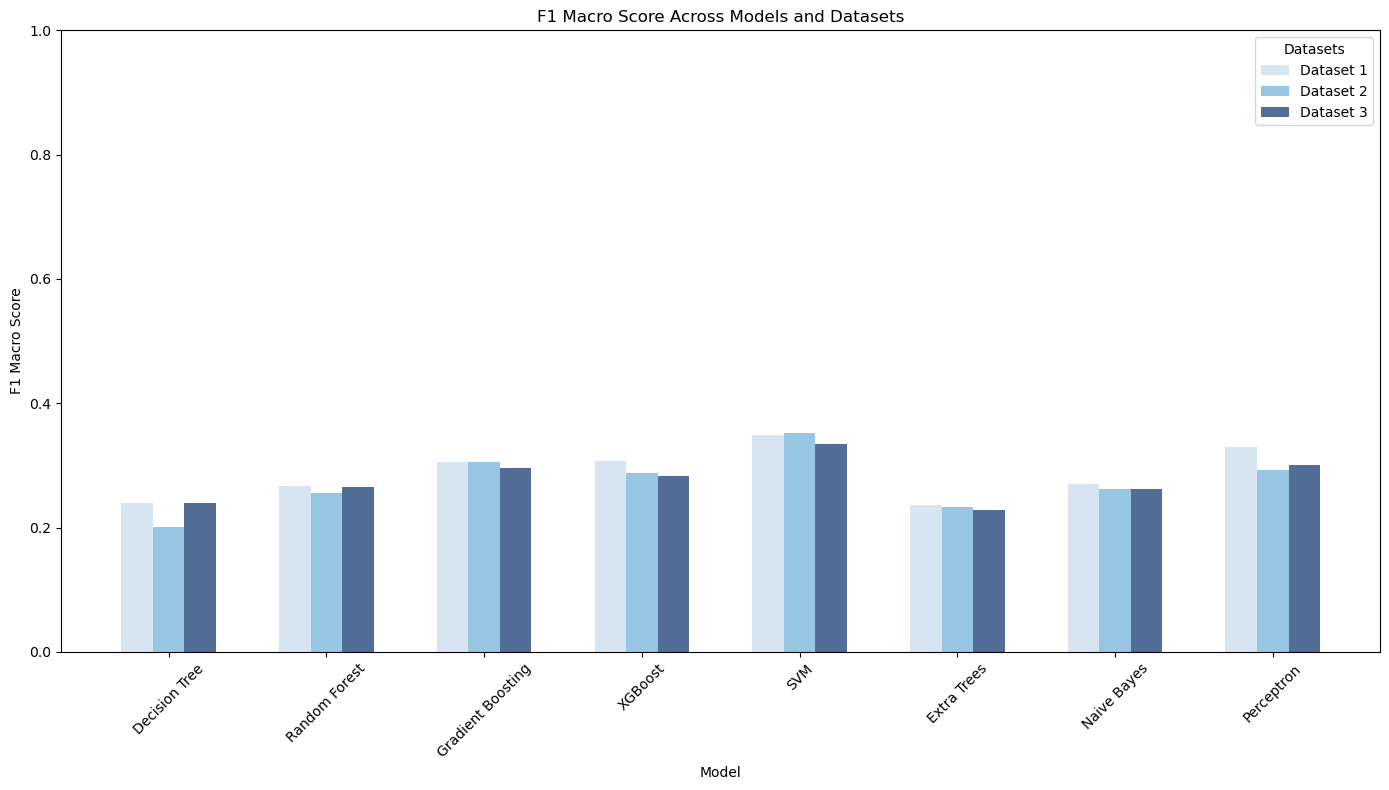

F1 score comparison plot saved at: C:\Users\reicd\Downloads\MY_ML_PROJECT\plots\F1_score_comparison\f1_score_macro_comparison.png


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from xgboost import XGBClassifier

# Define file paths for the datasets
file_paths = [
    r"C:\Users\reicd\Downloads\MY_ML_PROJECT\data\engineered data\prepared_narrowed_all_outliers_dropped.csv",
    r"C:\Users\reicd\Downloads\MY_ML_PROJECT\data\engineered data\prepared_narrowed_2_or_more_outliers_dropped.csv",
    r"C:\Users\reicd\Downloads\MY_ML_PROJECT\data\engineered data\prepared_narrowed_3_or_more_outliers_dropped.csv"
]

# Create directories for saving results
plots_dir = r"C:\Users\reicd\Downloads\MY_ML_PROJECT\plots\F1_score_comparison"
os.makedirs(plots_dir, exist_ok=True)

results_dir = r"C:\Users\reicd\Downloads\MY_ML_PROJECT\tests\f1_scores_default_table"
os.makedirs(results_dir, exist_ok=True)

# Define the models to evaluate
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "SVM": SVC(random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_jobs=-1, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Perceptron": Perceptron(random_state=42)
}

# Initialize results dictionary
f1_scores = {model_name: [] for model_name in models.keys()}

# Define the macro F1 scorer
f1_scorer = make_scorer(f1_score, average='macro')

# Evaluate models on each dataset using cross-validation
for file_path in file_paths:
    df = pd.read_csv(file_path)
    target_column = 'Phase'
    
    # Automatic transformation of the target variable
    X = df.drop(columns=target_column)
    y = df[target_column] - 1

    for model_name, model in models.items():
        # Using cross_val_score for automatic handling
        cv_scores = cross_val_score(model, X, y, cv=5, scoring=f1_scorer, n_jobs=-1)
        f1_scores[model_name].append(cv_scores.mean())

# Create a DataFrame for results
f1_scores_df = pd.DataFrame(f1_scores, index=[f'Dataset {i + 1}' for i in range(len(file_paths))])

# Save F1 scores table
table_file_path = os.path.join(results_dir, "f1_scores_macro_cross_val_comparison.csv")
f1_scores_df.to_csv(table_file_path)

print(f"F1 scores with cross-validation saved at: {table_file_path}")

# Plotting the results (side by side)
plt.figure(figsize=(14, 8))
bar_width = 0.2

# Create positions for each dataset's group of bars
positions = np.arange(len(models))
colors = ['#c6dbef', '#6baed6', '#08306b']
dataset_labels = f1_scores_df.index

for i, (dataset_label, color) in enumerate(zip(dataset_labels, colors)):
    new_positions = positions + i * bar_width
    plt.bar(new_positions, f1_scores_df.loc[dataset_label], width=bar_width, label=dataset_label, color=color, alpha=0.7)

plt.title('F1 Macro Score Across Models and Datasets')
plt.ylabel('F1 Macro Score')
plt.xlabel('Model')
plt.xticks(positions + bar_width, f1_scores_df.columns, rotation=45)
plt.legend(title='Datasets')
plt.ylim(0, 1)
plt.tight_layout()

# Save the plot
plot_file_path = os.path.join(plots_dir, "f1_score_macro_comparison.png")
plt.savefig(plot_file_path)
plt.show()

print(f"F1 score comparison plot saved at: {plot_file_path}")

F1 scores with cross-validation saved at: C:\Users\reicd\Downloads\MY_ML_PROJECT\tests\f1_scores_default_table\f1_scores_macro_cross_val_comparison.csv


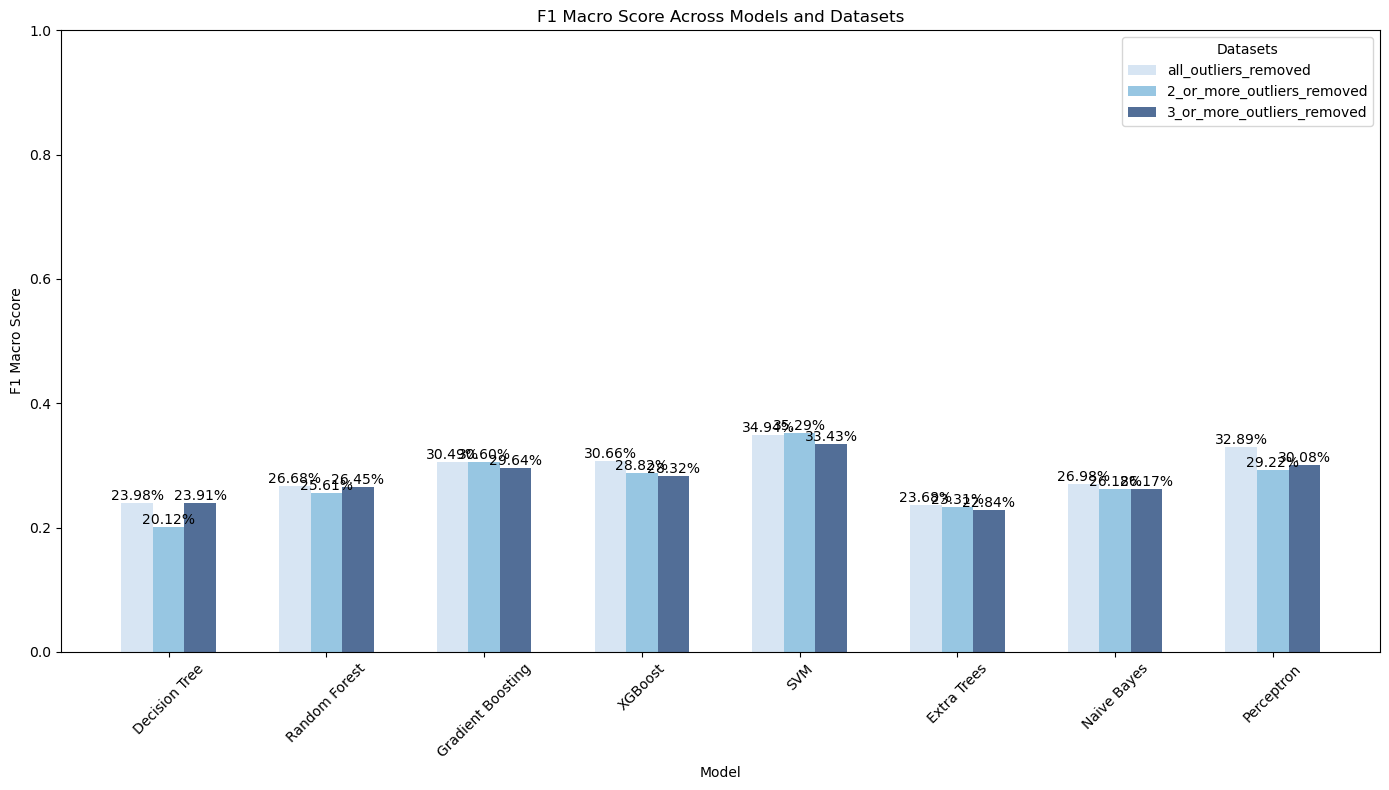

F1 score comparison plot saved at: C:\Users\reicd\Downloads\MY_ML_PROJECT\plots\F1_score_comparison\f1_score_macro_comparison.png


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from xgboost import XGBClassifier

# Define file paths for the datasets
file_paths = [
    r"C:\Users\reicd\Downloads\MY_ML_PROJECT\data\engineered data\prepared_narrowed_all_outliers_dropped.csv",
    r"C:\Users\reicd\Downloads\MY_ML_PROJECT\data\engineered data\prepared_narrowed_2_or_more_outliers_dropped.csv",
    r"C:\Users\reicd\Downloads\MY_ML_PROJECT\data\engineered data\prepared_narrowed_3_or_more_outliers_dropped.csv"
]

# Create directories for saving results
plots_dir = r"C:\Users\reicd\Downloads\MY_ML_PROJECT\plots\F1_score_comparison"
os.makedirs(plots_dir, exist_ok=True)

results_dir = r"C:\Users\reicd\Downloads\MY_ML_PROJECT\tests\f1_scores_default_table"
os.makedirs(results_dir, exist_ok=True)

# Define the models to evaluate
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "SVM": SVC(random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_jobs=-1, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Perceptron": Perceptron(random_state=42)
}

# Initialize results dictionary for storing F1 scores
f1_scores = {model_name: [] for model_name in models.keys()}

# Define the macro F1 scorer
f1_scorer = make_scorer(f1_score, average='macro')

# Evaluate models on each dataset using cross-validation
for file_path in file_paths:
    df = pd.read_csv(file_path)
    target_column = 'Phase'
    
    # Automatic transformation of the target variable
    X = df.drop(columns=target_column)
    y = df[target_column] - 1

    for model_name, model in models.items():
        # Using cross_val_score for automatic handling
        cv_scores = cross_val_score(model, X, y, cv=5, scoring=f1_scorer, n_jobs=-1)
        f1_scores[model_name].append(cv_scores.mean())

# Create a DataFrame for results
f1_scores_df = pd.DataFrame(f1_scores, index=[
    "all_outliers_removed",
    "2_or_more_outliers_removed",
    "3_or_more_outliers_removed"
])

# Save F1 scores table
table_file_path = os.path.join(results_dir, "f1_scores_macro_cross_val_comparison.csv")
f1_scores_df.to_csv(table_file_path)

print(f"F1 scores with cross-validation saved at: {table_file_path}")

# Descriptive labels for the datasets
dataset_labels = [
    "all_outliers_removed",
    "2_or_more_outliers_removed",
    "3_or_more_outliers_removed"
]

# Plotting the results (side by side)
plt.figure(figsize=(14, 8))
bar_width = 0.2

# Create positions for each dataset's group of bars
positions = np.arange(len(models))
colors = ['#c6dbef', '#6baed6', '#08306b']

for i, (dataset_label, color) in enumerate(zip(dataset_labels, colors)):
    new_positions = positions + i * bar_width
    bars = plt.bar(new_positions, f1_scores_df.iloc[i], width=bar_width, label=dataset_label, color=color, alpha=0.7)
    
    # =======================
    # Adding data labels on
    # each bar in the plot 
    # with percentage format 
    # and two decimal places.
    # You can adjust the font 
    # size by modifying the value
    # in `fontsize` as needed.
    # =======================
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2, 
            height, 
            f'{height * 100:.2f}%',  # Convert to percentage
            ha='center', 
            va='bottom',
            fontsize=10  # Adjust fontsize as needed
        )

# =======================
# Utilize descriptive
# labels for each dataset
# to ensure the plot's legend
# accurately reflects the
# source and context of the
# data used for training the
# models. This enhances readability
# and precision in presentation.
# =======================
plt.title('F1 Macro Score Across Models and Datasets')
plt.ylabel('F1 Macro Score')
plt.xlabel('Model')
plt.xticks(positions + bar_width, f1_scores_df.columns, rotation=45)
plt.legend(title='Datasets')  # The legend is setup with descriptive dataset labels
plt.ylim(0, 1)
plt.tight_layout()

# Save the plot
plot_file_path = os.path.join(plots_dir, "f1_score_macro_comparison.png")
plt.savefig(plot_file_path)
plt.show()

print(f"F1 score comparison plot saved at: {plot_file_path}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from xgboost import XGBClassifier

# Define file paths for the datasets
file_paths = [
    r"C:\Users\reicd\Downloads\MY_ML_PROJECT\data\engineered data\prepared_narrowed_all_outliers_dropped.csv",
    r"C:\Users\reicd\Downloads\MY_ML_PROJECT\data\engineered data\prepared_narrowed_2_or_more_outliers_dropped.csv",
    r"C:\Users\reicd\Downloads\MY_ML_PROJECT\data\engineered data\prepared_narrowed_3_or_more_outliers_dropped.csv"
]

# Create directories for saving results
plots_dir = r"C:\Users\reicd\Downloads\MY_ML_PROJECT\plots\F1_score_comparison"
os.makedirs(plots_dir, exist_ok=True)

results_dir = r"C:\Users\reicd\Downloads\MY_ML_PROJECT\tests\f1_scores_default_table"
os.makedirs(results_dir, exist_ok=True)

# Define the models to evaluate
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "SVM": SVC(random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_jobs=-1, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Perceptron": Perceptron(random_state=42)
}

# Initialize results dictionary for storing F1 scores
f1_scores = {model_name: [] for model_name in models.keys()}

# Define the macro F1 scorer
f1_scorer = make_scorer(f1_score, average='macro')

# Evaluate models on each dataset using cross-validation
for file_path in file_paths:
    df = pd.read_csv(file_path)
    target_column = 'Phase'
    
    # Automatic transformation of the target variable
    X = df.drop(columns=target_column)
    y = df[target_column] - 1

    for model_name, model in models.items():
        # Using cross_val_score for automatic handling
        cv_scores = cross_val_score(model, X, y, cv=5, scoring=f1_scorer, n_jobs=-1)
        f1_scores[model_name].append(cv_scores.mean())

# Create a DataFrame for results
f1_scores_df = pd.DataFrame(f1_scores, index=[
    "all_outliers_removed",
    "2_or_more_outliers_removed",
    "3_or_more_outliers_removed"
])

# Save F1 scores table
table_file_path = os.path.join(results_dir, "f1_scores_macro_cross_val_comparison.csv")
f1_scores_df.to_csv(table_file_path)

print(f"F1 scores with cross-validation saved at: {table_file_path}")

# Descriptive labels for the datasets
dataset_labels = [
    "all_outliers_removed",
    "2_or_more_outliers_removed",
    "3_or_more_outliers_removed"
]

# Plotting the results (side by side)
plt.figure(figsize=(14, 8))
bar_width = 0.2

# Create positions for each dataset's group of bars
positions = np.arange(len(models))
colors = ['#c6dbef', '#6baed6', '#08306b']

for i, (dataset_label, color) in enumerate(zip(dataset_labels, colors)):
    new_positions = positions + i * bar_width
    bars = plt.bar(new_positions, f1_scores_df.iloc[i], width=bar_width, label=dataset_label, color=color, alpha=0.7)
    
    # =======================
    # Adding data labels on
    # each bar in the plot 
    # with percentage format 
    # and two decimal places.
    # You can adjust the font 
    # size by modifying the value
    # in `fontsize` as needed.
    # =======================
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2, 
            height, 
            f'{height * 100:.2f}%',  # Convert to percentage
            ha='center', 
            va='bottom',
            fontsize=6  # Adjust fontsize as needed
        )

# =======================
# Utilize descriptive
# labels for each dataset
# to ensure the plot's legend
# accurately reflects the
# source and context of the
# data used for training the
# models. This enhances readability
# and precision in presentation.
# =======================
plt.title('F1 Macro Score Across Models and Datasets')
plt.ylabel('F1 Macro Score')
plt.xlabel('Model')
plt.xticks(positions + bar_width, f1_scores_df.columns, rotation=45)
plt.legend(title='Datasets')  # The legend is setup with descriptive dataset labels
plt.ylim(0, 1)
plt.tight_layout()

# Save the plot
plot_file_path = os.path.join(plots_dir, "f1_score_macro_comparison.png")
plt.savefig(plot_file_path)
plt.show()

print(f"F1 score comparison plot saved at: {plot_file_path}")